# 19기 Time Series 정규세션 과제

### Electric_Production.csv 데이터를 활용하여 자유롭게 시계열분석을 진행해주세요.
첨부한 '시계열자료_실습.ipynb' 코드를 참고하셔도 좋습니다.


### Box-Jenkins 방법론
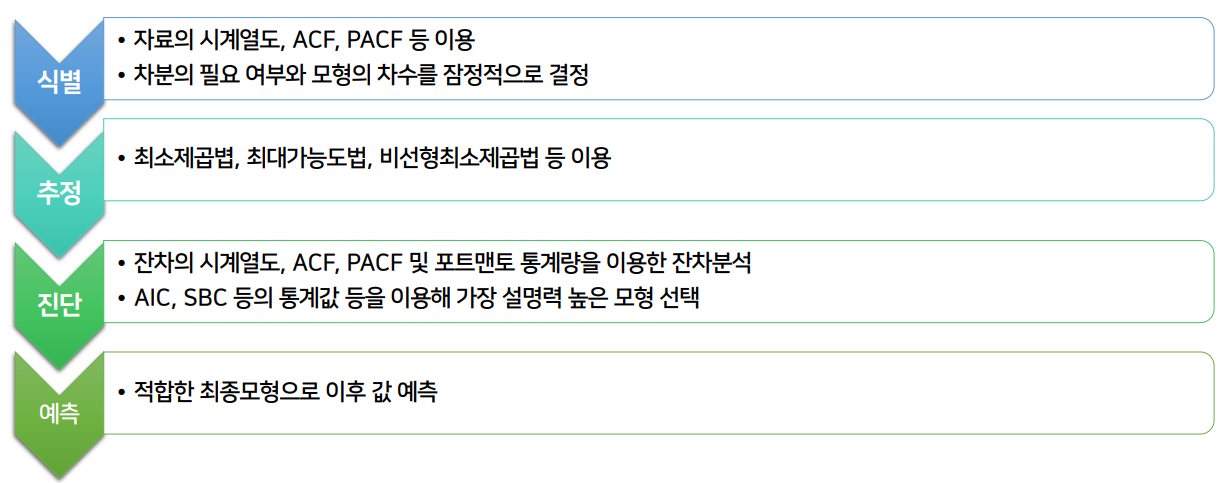

### Prophet
튜토리얼 : https://hyperconnect.github.io/2020/03/09/prophet-package.html

## 라이브러리 불러오기

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 

## 데이터 불러오기

In [2]:
samsung_df = yf.download('005930.KS',
                      start='2020-01-01',
                      end='2021-04-21',
                      progress=False)

samsung_df = samsung_df[["Close"]]

samsung_df = samsung_df.reset_index()

samsung_df.columns = ['day', 'price']

samsung_df['day'] = pd.to_datetime(samsung_df['day'])

samsung_df.index = samsung_df['day']
samsung_df.set_index('day', inplace=True)

samsung_df

,price
day,
2020-01-02,55200.0
2020-01-03,55500.0
2020-01-06,55500.0
2020-01-07,55800.0
2020-01-08,56800.0
...,...
2021-04-14,84000.0
2021-04-15,84100.0
2021-04-16,83900.0


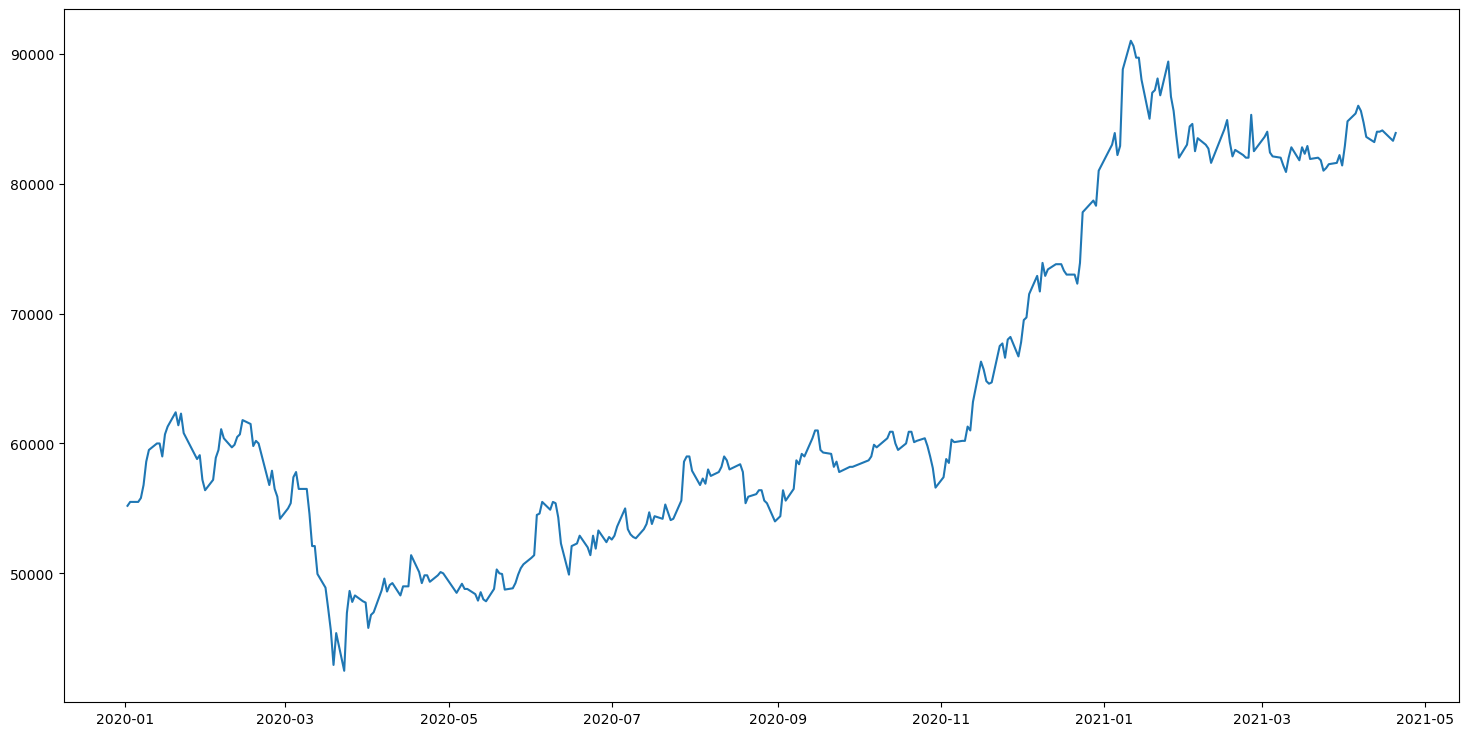

In [3]:
plt.figure(figsize=(18,9))
plt.plot(samsung_df.index, samsung_df.price)
plt.show()

In [4]:
samsung_df["price"]

day
2020-01-02    55200.0
2020-01-03    55500.0
2020-01-06    55500.0
2020-01-07    55800.0
2020-01-08    56800.0
               ...   
2021-04-14    84000.0
2021-04-15    84100.0
2021-04-16    83900.0
2021-04-19    83300.0
2021-04-20    83900.0
Name: price, Length: 322, dtype: float64

In [5]:
samsung_df_ = pd.concat([pd.DataFrame(index = pd.date_range(min(samsung_df.index), 
                   max(samsung_df.index))), samsung_df], axis=1).interpolate()

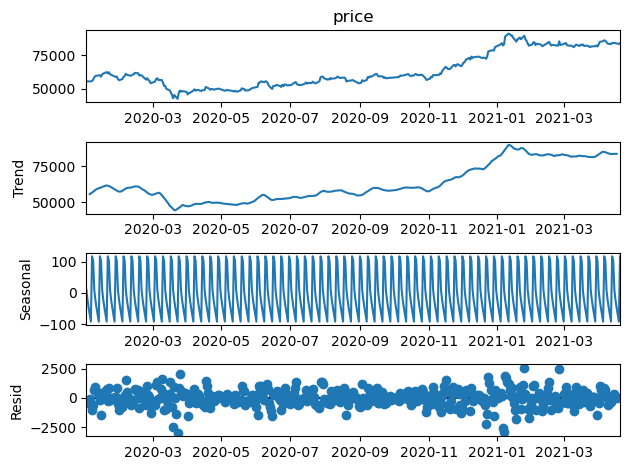

In [6]:
samsung_decompose = seasonal_decompose(samsung_df_["price"])
samsung_decompose.plot()
plt.show()

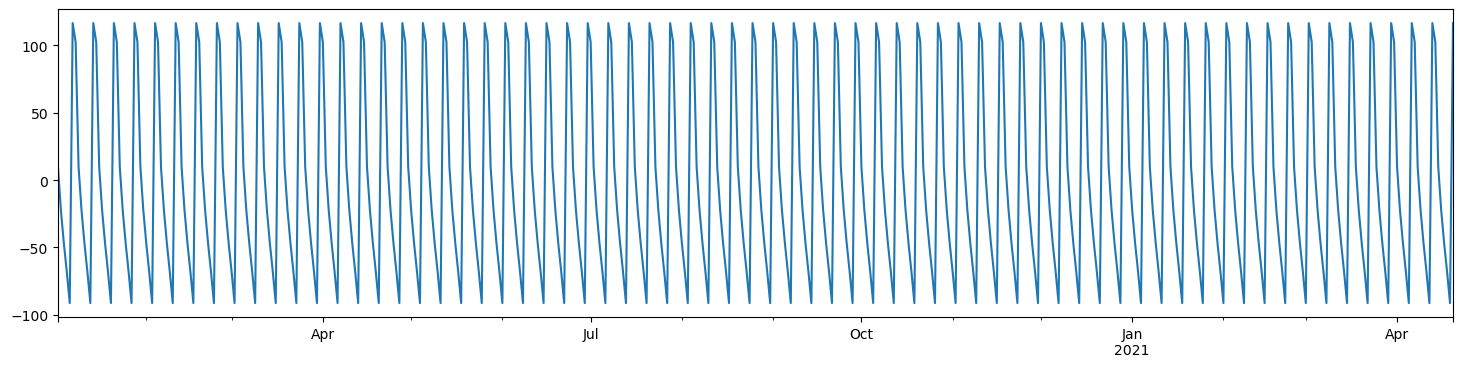

In [7]:
# 8일 주기
samsung_decompose.seasonal.plot(figsize=(18,4))
plt.show()

In [18]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

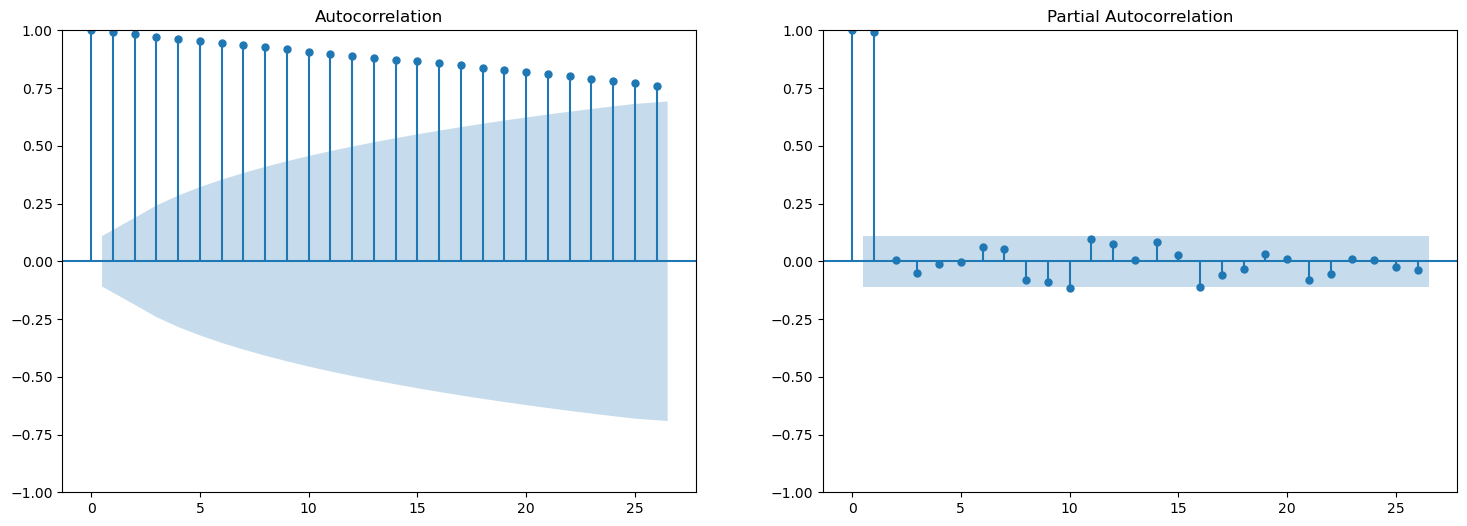

In [23]:
fig, axes = plt.subplots(1,2, figsize=(18,6))
plot_acf(samsung_df["price"], ax=axes[0]) #
plot_pacf(samsung_df["price"], ax=axes[1]) # 2 이후 점선 구간 내에 존재
plt.show()

### SARIMA Forecast

In [14]:
train = samsung_df[:-14]
test = samsung_df[-14:]

In [27]:
from statsmodels.tsa.arima.model import ARIMA

model_arima = ARIMA(train["price"], order=(0,1,2))
res_arima = model_arima.fit()
res_arima.summary()

/Users/kwon-yujin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kwon-yujin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kwon-yujin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                  308
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -2621.795
Date:                Tue, 14 Mar 2023   AIC                           5249.591
Time:                        22:33:42   BIC                           5260.771
Sample:                             0   HQIC                          5254.062
                                - 308                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0088      0.046      0.192      0.848      -0.081       0.099
ma.L2          0.0086      0.052      0.165      0.869      -0.094       0.111
sigma2      1.554e+06   9.05e+04     17.173      0.000    1.38e+06    1.73e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                58.42
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.47   Skew:                             0.55
Prob(H) (two-sided):                  0.05   Kurtosis:                         4.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

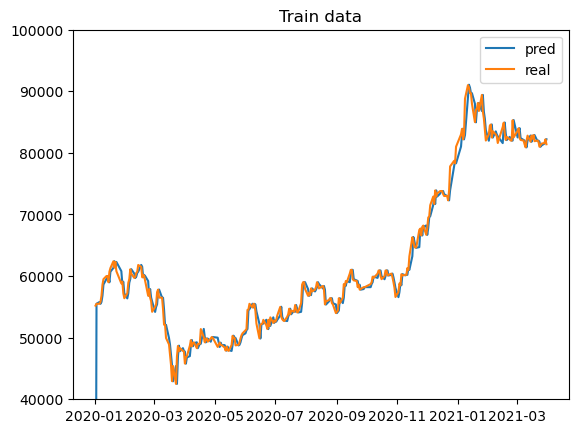

In [35]:
plt.plot(res_arima.predict(), label="pred")
plt.plot(train, label="real")
plt.title("Train data")
plt.ylim(40000, 100000)
plt.legend()
plt.show()

In [37]:
res_arima.forecast(steps=20)

/Users/kwon-yujin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


308    81398.007922
309    81391.061725
310    81391.061725
311    81391.061725
312    81391.061725
313    81391.061725
314    81391.061725
315    81391.061725
316    81391.061725
317    81391.061725
318    81391.061725
319    81391.061725
320    81391.061725
321    81391.061725
322    81391.061725
323    81391.061725
324    81391.061725
325    81391.061725
326    81391.061725
327    81391.061725
Name: predicted_mean, dtype: float64

/Users/kwon-yujin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


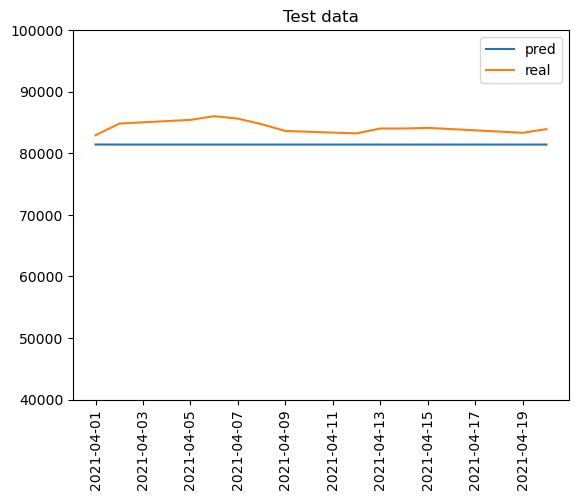

In [41]:
plt.plot(pd.date_range(min(test.index), max(test.index)), 
         res_arima.forecast(steps=20), label="pred")
plt.plot(test, label="real")
plt.title("Test data")
plt.xticks(rotation=90)
plt.ylim(40000, 100000)
plt.legend()
plt.show()